# Pulsar classification with logistic regression

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf #make interactive plots with cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#read the csv in a dataframe callded "advertising_data"
pulsar = pd.read_csv('pulsar.csv')

In [6]:
#Take a look at the head of the this datafram to see the columns
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


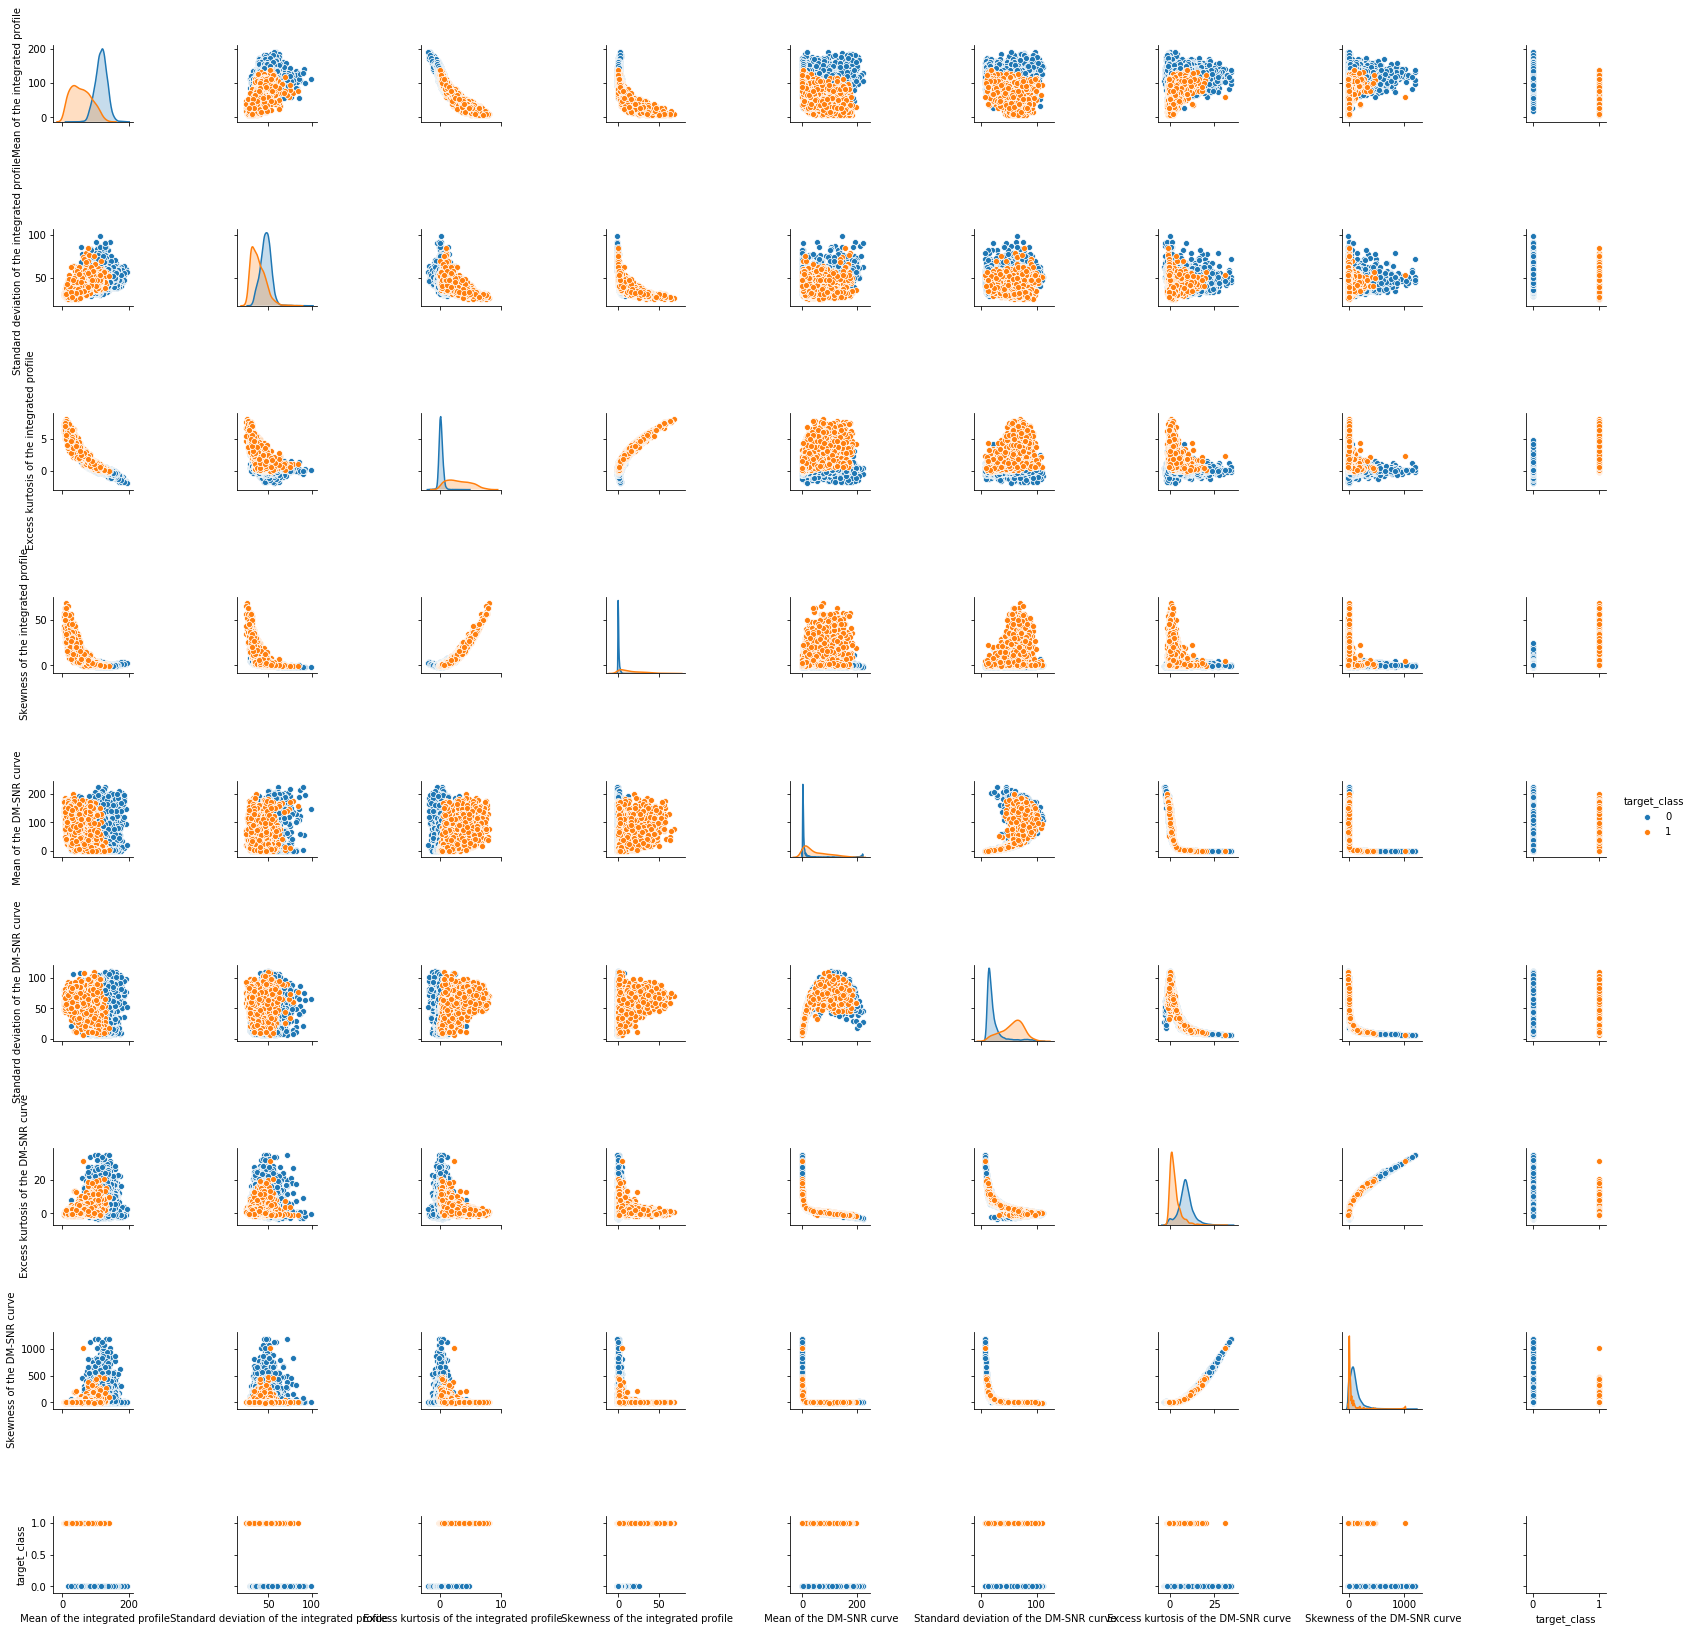

In [7]:
#Ik ga een pairplot maken zodat ik snel kan checken of er bepaalde correlaties tussen kolommen zijn:
sns.pairplot(pulsar, hue="target_class");

In [8]:
#We will setup the X and the y (predict label) from the dataset
X=pulsar.drop('target_class', axis=1)
y=pulsar['target_class']

In [12]:
pulsar.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()

In [16]:
logmodel.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
predictions = logmodel.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4899
           1       0.93      0.84      0.88       471

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370



In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, predictions)

array([[4869,   30],
       [  74,  397]], dtype=int64)